# Image Display Examples

In [1]:
from __future__ import print_function, unicode_literals, division, absolute_import

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
import IPython

from widget_canvas import widget_canvas

In [2]:
# Load some image data into Numpy arrays.
data_image = imageio.imread('images/Whippet.jpg')

data_image.shape

(220, 320, 3)

## Matplotlib and `imshow()`

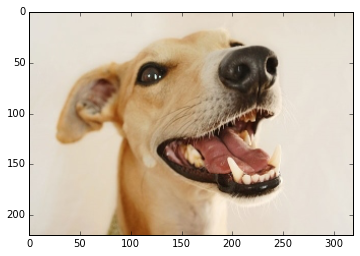

In [3]:
plt.imshow(data_image);

## HTML Canvas Element and JavaScript

In [4]:
%%html

<html>
    <head></head>
    <body>
        <canvas id='hello_example' style='border: solid black 2px'/>
    </body>
</html>

In [5]:
%%javascript

// URL to elephant image at wikipedia.com.
var url = 'https://raw.githubusercontent.com/Who8MyLunch/ipynb_widget_canvas/master/notebooks/images/Whippet.jpg'

// Get the canvas element plus corresponding drawing context
var canvas = document.getElementById('hello_example');
var context = canvas.getContext('2d');

// Create a hidden <img> element to manage incoming data.
var img = new Image();

// Add new-data event handler to the hidden <img> element.
img.onload = function () {
    // This function will be called when new image data has finished loading
    // into the <img> element.  This new data will be the source for drawing
    // onto the Canvas.

    // Set canvas geometry.
    canvas.width = img.width
    canvas.style.width = img.width + 'px'

    canvas.height = img.height
    canvas.style.height = img.height + 'px'

    // Draw new image data onto the Canvas.
    context.drawImage(img, 0, 0);
}

// Assign image URL.
img.src = url

<IPython.core.display.Javascript object>

# IPython's Built-in Image Widget

The built-in widget accepts as input a string of byte data representing an already-compressed image.  In the example below image data is compressed using the awesome `imageio` Python [package](https://imageio.readthedocs.org/en/latest/).

In [6]:
# Compress the image data.
data_comp = imageio.imwrite(imageio.RETURN_BYTES, data_image, format='png')

# Display first 100 bytes of compressed data just for fun.
data_comp[:100]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x00\xdc\x08\x02\x00\x00\x00\x8e!\xefq\x00\x00\x00\tpHYs\x00\x00\x0b\x13\x00\x00\x0b\x13\x01\x00\x9a\x9c\x18\x00\x00 \x00IDATx\xda\xd4\xbdY\x93$\xc9q&\xa8\x87\x99\xbbGDf\x1d\xdd\xd5@\xe3&\xc0!\x81!g8\xe4\xce>PH\x19r\x84?'

In [10]:
IPython.html.widgets.Image()

In [7]:
# Built-in IPython image widget.
wid_builtin = IPython.html.widgets.Image(value=data_comp)

wid_builtin

In [8]:
wid_builtin.border_color='black'
wid_builtin.border_width=2

# My New Canvas Widget

In [9]:
wid_canvas = widget_canvas.CanvasImage(data_image)

wid_canvas.border_color='black'
wid_canvas.border_width=2

wid_canvas